# Introduction to Physics-informed neural networks

## 1- Introduction to neural networks

**Parametric statistics.** In supervised learning, the goal is to learn a function $f^\star$ linking the explanatory variable $X$ to the target variable $Y$, i.e., such that $Y = f^\star(X)+\epsilon$, where $\epsilon$ is a random noise.
In practice, $f^\star$ is estimated by $f_{\hat{\theta}}$, where $\hat{\theta}$ is a minimizer of the empirical risk
$$L(\theta) = \frac{1}{n}\sum_{i=1}^n |f_\theta(X_i)-Y_i|^2 + R(\theta),$$
where
* $(X_1, Y_1), \dots, (X_n,Y_n)$ are i.i.d. observations of $(X,Y)$,
* the function class $\{f_\theta,\; \theta\in \Theta\}$ is chosen to best approximate $f^\star$,
* $R(\theta)$ is a regularization term (e.g., Ridge, LASSO...) tailored to avoid overfitting.

**Neural networks.** Neural networks are a kind of parametric functions. They consist of a series of basic operations called *layers*, and the intermediate results of these layers are called the *neurons*. In what follows, we focus on *dense neural networks*, which are a succession of affine transformations and elementwise applications of the hyperbolic tangent (*tanh*) function.

**Question 1.** Let the function $f: \mathbb R^2 \to \mathbb R$ be defined by
$$f(t, x) = B_1 \tanh(A_1 t + A_2 x + A_3) + B_2 \tanh(A_4 t + A_5 x + A_6) + B_3 \tanh(A_7 t + A_8 x + A_9) + B_4.$$

a) Show that $f$ is a neural network.

b) What is the parameter $\theta$ such that $f = f_\theta$?

c) How many layers and neurons are there?



**Answer.**
<details>
  <summary>  (Click to show)</summary>
a) $f$ can be writen
$$f(t,x) = B \circ \tanh \circ A \begin{pmatrix} t\\ x\end{pmatrix}$$ where

*  $A \begin{pmatrix} t\\ x\end{pmatrix}= \begin{pmatrix} A_1 & A_2\\ A_4 & A_5 \\ A_7 & A_8\end{pmatrix} \begin{pmatrix} t\\ x\end{pmatrix} + \begin{pmatrix} A_3\\ A_6\\ A_9\end{pmatrix},$ is an affine transformation
* $\tanh (x_1, x_2, x_3) = (\tanh(x_1), \tanh(x_2), \tanh(x_3))$ is the elementwise application of the hyperbolic tangent,
* the neurons $z_1, z_2, z_3$ of the first layer are defined by $\begin{pmatrix} z_1\\ z_2\\z_3\end{pmatrix} =  \tanh \circ A \begin{pmatrix} t\\ x\end{pmatrix}$,
* and
$B \begin{pmatrix} z_1\\ z_2\\z_3\end{pmatrix}= \begin{pmatrix} B_1 & B_2 & B_3\end{pmatrix} \begin{pmatrix} z_1\\ z_2\\ z_3\end{pmatrix} + B_4$ is an affine transformation.

b) Here, the parameter $\theta$ are the parameters $(A_1, \dots, A_9, B_1, \dots, B_4)$ of the affine transformations.

c) Since the output space of $A: \mathbb R^2 \to \mathbb R^3$ is of dimension 3, there are 3 neurons in the first layers. Since we apply the activation function, tanh, only once, there is only one layer. Therefore, there is one layer with three neurons.
</details>

Neural networks are popular because they are a class of nonlinear functions, and computing their derivatives can be done efficiently using the so-called *backpropagation* algorithm. Most neural networks are implemented using the *Python* programming language. Currently, the two most popular deep learning libraries are *PyTorch* (torch) and *Tensorflow* (tf). In this tutorial, we will use PyTorch.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In what follows, we will rely heavily on the generation of random numbers. For example, when initializing a neural network, the weights are sampled according to a Gaussian distribution.
To ensure reproducibility of the results, we must keep track of the random numbers generated. We define a number, called a *seed*, which completely determines how the random number generator will be initialized.
Using the same seed will produce the same outputs.

In [ ]:
torch.manual_seed(314)

In [ ]:
# The next line means that we define a new type, called "NeuralNet", based on the
# structure of the neural network "nn.Module".
class NeuralNet(nn.Module):

# This new object will come with two functions "__init__" and "forward".
# "__init__" is useful to give an initial value to the variable "NeuralNet".

    def __init__(self):
        super(NeuralNet, self).__init__()

        # Here, we define the structure of the neural network.
        self.net = nn.Sequential(
            nn.Linear(2, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, t, x):
        input = torch.cat([t, x], dim=1)
        return self.net(input)

**Question 2.** Detail the architecture of this neural network.

**Answer.**
<details>
  <summary>  (Click to show)</summary>
This neural network is a *dense* neural network with 3 layers, since we apply the activation function $\tanh$ three times. Each layer contains 10 neurons.
</details>

**GPU programming.** Graphics processing units (GPUs) are specialized electronic circuits designed to run some basic linear algebra operations more efficiently than cheaper, more common central processing units (CPUs). GPUs rely on both parallelization and efficient memory allocation. Pytorch provides a very simple way to run code on a GPU. The following command automatically detects whether a GPU is available, and sets the *device* variable to either the available GPU, or the CPU if no GPU is available.

In [ ]:
# Detect a NVIDIA GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

For MacOS users who want to use their M1, M2, or M3 GPU, the command is as follows.

In [ ]:
# Detect a GPU on MacOS computers
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

Then, the following line automatically samples a 2x2 array of uniform random variables on the *device*.

In [ ]:
test_variable = torch.rand(2, 2, device=device)
print(test_variable)

tensor([[0.7196, 0.6295],
        [0.6667, 0.3385]])


Note how lists of numbers are referred to as *tensors* in the PyTorch framework.
Tensors can represent many objects of linear algebra. For example,

* the vector $(1, 4)$ corresponds to $\hbox{tensor}([1, 4])$ of shape $(2,)$,
* the vector $\begin{pmatrix}1\\ 4\end{pmatrix}$  corresponds to $\hbox{tensor}([[1], [4]])$ of shape $(2,1)$,
* the matrix $\begin{pmatrix}1& 3\\ 4& -1\end{pmatrix}$ corresponds to $\hbox{tensor}([[1, 3], [4, -1]])$ of shape $(2,2)$.

We say that a tensor is of size $(*, 1)$ if its size is of the form $(n, 1)$.
Tensors supports various types of linear functions like

* addition and subtraction, encodes by the symbols + and -
* matrix-matrix and matrix-vector multiplications, encoded by the symbol @
* elementwise multiplication, encoded by the symbol *

## 2- PDE solving with PINNs

**PDE solving.** Here, we apply the tools from parametric statistics with neural networks to solve PDEs. To give a concrete example, let's solve the heat equation
$$\partial_1 f = \partial^2_{2,2} f$$
on the square $[0,1]^2$, with
* the boundary conditions $$\forall t\in [0,1],\; f(t, 0) = f(t, 1) = 0,$$
* and the initial conditions $$\forall x\in [0,1],\; f(0, x) = \sin(\pi x).$$

To solve this PDE, the *physics-informed neural networks* (PINNs) approach consists in minimizing the loss
$$L(\theta) = \frac{1}{n_i}\sum_{i=1}^{n_i}(f_\theta(0, X^{(ini)}_i)-\sin(\pi X^{(ini)}_i))^2 + \frac{1}{n_b}\sum_{j=1}^{n_b}[f_\theta(T^{(b)}_j, 0)^2+f_\theta(T^{(b)}_j, 1)^2] + \frac{1}{n_c}\sum_{k=1}^{n_c}(\partial_t f_\theta(T^{(c)}_k, X^{(c)}_k)-\partial^2_{x,x} f_\theta(T^{(c)}_k, X^{(c)}_k))^2,$$
where the points $X^{(ini)}_i$, $T^{(b)}_j$, $T^{(c)}_k$, and $X^{(c)}_k$ are independent and sampled along the uniform distribution on $[0,1]$.

**Question 3.** Given a fixed parameter $\theta$, what is the limit of $L(\theta)$ as $n_i, n_b, n_c \to \infty$?

**Answer.**
<details>
  <summary>  (Click to show)</summary>
The law of large number states that the empirical risk $L(\theta)$ converges almost surely to the theoretical risk $R(\theta)$ defined by
$$\lim_{n_b, n_c \to \infty} L(\theta) = R(\theta) = \int_0^1(f_\theta(0, x)-\sin(\pi x))^2dx + \int_0^1 (f_\theta(t, 0)^2+f_\theta(t, 1)^2)dt + \int_0^1(\partial_t f_\theta(t,x)-\partial^2_{x,x} f_\theta(t,x))^2dtdx.$$
</details>

**Question 4.** Let $R(\theta) = \lim_{n_i, n_b, n_c\to \infty} L(\theta)$. Why does minimizing $R$ amounts to solving the PDE?

**Answer.**
<details>
  <summary>  (Click to show)</summary>
Note that $\forall \theta, \;R(\theta) \geq 0$. Morevoer, $R(\theta) = 0$ if and only if $f_\theta$ satifies the initial conditions, the boundary conditions, and the PDE.
</details>

**Question 5.** Implement a function *pde_residual* computing the PDE residual $\partial_t u - \partial^2_{x,x}u$, where $u$ is a neural network. To do so, use the following framework of Pytorch, which allows to compute the derivarive of $u$ with respect to a variable $t$.

In [ ]:
# PDE residual
def pde_residual(model, t, x):
    t.requires_grad_(True)
    x.requires_grad_(True)
    u = model(t, x)

    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), retain_graph=True, create_graph=True)[0]
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), retain_graph=True, create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]

    return u_t - u_xx

**Question 6.** Implement a function that generates the training data using the following functions from the *torch* library: *rand*, *randn*, *zeros*, *ones*, *linspace*, and *sin*. As is typical with neural networks, all tensors must be of shape $(*, 1)$.

In [ ]:
# Training data
def generate_training_data(N_f=10**4, N_b=10**2, N_i=10**2):
    # Collocation points (interior)
    t_f = torch.rand(N_f, 1, device=device)
    x_f = torch.rand(N_f, 1, device=device)

    # Boundary conditions
    t_b = torch.rand(N_b, 1, device=device)
    x_b0 = torch.zeros_like(t_b, device=device)
    x_b1 = torch.ones_like(t_b, device=device)

    # Initial condition
    x_i = torch.linspace(0, 1, N_i, device=device).view(-1, 1)
    t_i = torch.zeros_like(x_i, device=device)
    u_i = torch.sin(torch.pi * x_i)

    return t_f, x_f, t_b, x_b0, x_b1, t_i, x_i, u_i

**Question 7.** Implement the gradient descent to train the neural network.

In [ ]:
# Training loop
def train(model, epochs=5000, lr=1e-3):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    t_f, x_f, t_b, x_b0, x_b1, t_i, x_i, u_i = generate_training_data(N_f=10**4, N_b=10**2, N_i=10**2)

    for epoch in range(epochs):

        optimizer.zero_grad()

        # PDE residual loss
        f = pde_residual(model, t_f, x_f)
        loss_f = torch.mean(f**2)

        # Boundary condition loss
        u_b0 = model(t_b, x_b0)
        u_b1 = model(t_b, x_b1)
        loss_b = torch.mean(u_b0**2) + torch.mean(u_b1**2)

        # Initial condition loss
        u_pred_i = model(t_i, x_i)
        loss_i = torch.mean((u_pred_i - u_i)**2)

        loss = loss_f + loss_b + loss_i
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4e}")

    print("Training complete.")

**Question 8.** Reset the seed to 314. Then, train your neural network.

In [ ]:
torch.manual_seed(314)

model = NeuralNet().to(device)
train(model)

Epoch 0, Loss: 1.1918e+00
Epoch 500, Loss: 2.0606e-01
Epoch 1000, Loss: 1.1292e-01
Epoch 1500, Loss: 4.1018e-02
Epoch 2000, Loss: 8.9301e-03
Epoch 2500, Loss: 9.8419e-04
Epoch 3000, Loss: 3.4359e-04
Epoch 3500, Loss: 2.4398e-04
Epoch 4000, Loss: 2.1848e-04
Epoch 4500, Loss: 1.5120e-04
Training complete.


**Analytical solutions.**
To estimate the performance of the PINN, we can compare its outputs with the unique solution $f^\star$ of the PDE $$f^\star(t,x) = \exp(-\pi^2 t)\sin(\pi x).$$

**Question 9.** Check that $f^\star$ is indeed a solution of the PDE.

**Answer.**
<details>
  <summary>  (Click to show)</summary>
On the one hand,
$$\partial_t f = -\pi^2 f.$$
On the other hanf,
$$\partial^2_{x,x} f = -\pi^2 f.$$
Thus, $\partial_t f = \partial^2_{x,x} f$.
</details>

**Question 10.** Using three plots, plot the functions $f^\star$, the PINN, and the error $|\hbox{PINN}-f^\star|$. Compute the Mean Average Error (MAE) $$MAE = \frac{1}{100^2}\sum_{k=0}^{100} \sum_{\ell=0}^{100} |\hbox{PINN}(k/100, \ell/100)-f^\star(k/100, \ell/100)|.$$

In [ ]:
def plot(model):
  # Evaluate on a grid
  t_vals = torch.linspace(0, 1, 100)
  x_vals = torch.linspace(0, 1, 100)
  T, X = torch.meshgrid(t_vals, x_vals, indexing='ij')
  t_flat = T.reshape(-1, 1).to(device)
  x_flat = X.reshape(-1, 1).to(device)

  # PINN prediction
  model.eval()
  with torch.no_grad():
      u_pred_flat = model(t_flat, x_flat).cpu().numpy()
  u_pred = u_pred_flat.reshape(100, 100)

  # Analytical solution
  T_np = T.cpu().numpy()
  X_np = X.cpu().numpy()
  u_true = np.exp(-np.pi**2 * T_np) * np.sin(np.pi * X_np)

  # Difference
  diff = np.abs(u_pred - u_true)

  # Plot
  fig, axs = plt.subplots(1, 3, figsize=(18, 5))

  # PINN
  c0 = axs[0].contourf(X_np, T_np, u_pred, 100, cmap='viridis')
  fig.colorbar(c0, ax=axs[0])
  axs[0].set_title('PINN Solution')
  axs[0].set_xlabel('x')
  axs[0].set_ylabel('t')

  # Analytical
  c1 = axs[1].contourf(X_np, T_np, u_true, 100, cmap='viridis')
  fig.colorbar(c1, ax=axs[1])
  axs[1].set_title('Analytical Solution')
  axs[1].set_xlabel('x')
  axs[1].set_ylabel('t')

  # Difference
  c2 = axs[2].contourf(X_np, T_np, diff, 100, cmap='magma')
  fig.colorbar(c2, ax=axs[2])
  axs[2].set_title('Absolute Error: |PINN - Ground truth|')
  axs[2].set_xlabel('x')
  axs[2].set_ylabel('t')

  plt.tight_layout()
  plt.show()

  print("\n", "The mean absolute error (MAE) is ", np.mean(diff))

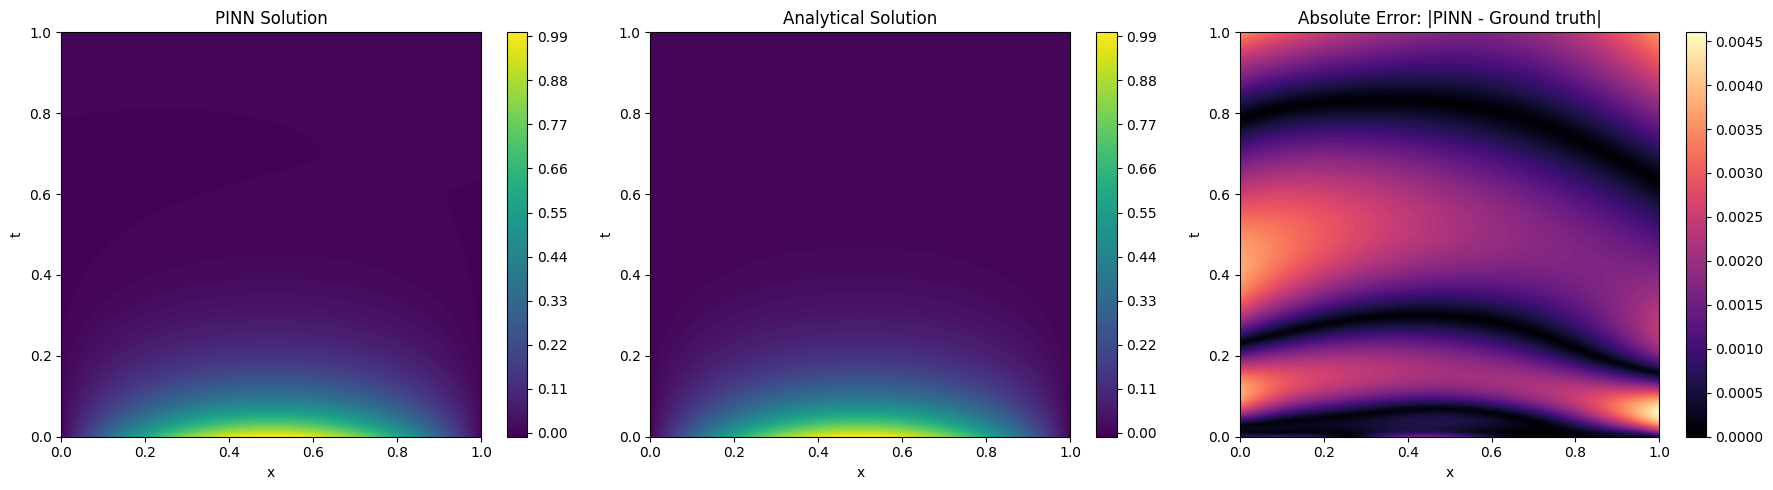


 The mean absolute error (MAE) is  0.0014350069


In [ ]:
plot(model)

# 3- Some basic improvements over vanilla PINNs

There are many ways to improve this implementation, but which complicates the understanding of the code baseline.
For instance, instead of fixing the collocation points, and the points penalizing the boundary and initial conditions, we can sample new points at each epoch. This has the advantage of both increasing the number of available data while reducing overfitting.

**Question 11.** Implement this PINN where data are resampled at each epoch.

In [ ]:
def train_2(model, epochs=5000, lr=1e-3):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)


    for epoch in range(epochs):

        # Here, we sample new points at each epoch
        t_f, x_f, t_b, x_b0, x_b1, t_i, x_i, u_i = generate_training_data(N_f=10**4, N_b=10**2, N_i=10**2)

        optimizer.zero_grad()

        # PDE residual loss
        f = pde_residual(model, t_f, x_f)
        loss_f = torch.mean(f**2)

        # Boundary condition loss
        u_b0 = model(t_b, x_b0)
        u_b1 = model(t_b, x_b1)
        loss_b = torch.mean(u_b0**2) + torch.mean(u_b1**2)

        # Initial condition loss
        u_pred_i = model(t_i, x_i)
        loss_i = torch.mean((u_pred_i - u_i)**2)

        loss = loss_f + loss_b + loss_i
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4e}")

    print("Training complete.")


**Question 12.** Train your model and compare its MAE with the other PINN.

Epoch 0, Loss: 1.1918e+00
Epoch 500, Loss: 2.0435e-01
Epoch 1000, Loss: 1.3513e-01
Epoch 1500, Loss: 5.8640e-02
Epoch 2000, Loss: 1.4019e-02
Epoch 2500, Loss: 4.6026e-03
Epoch 3000, Loss: 2.0593e-03
Epoch 3500, Loss: 1.1177e-03
Epoch 4000, Loss: 6.4472e-04
Epoch 4500, Loss: 4.4271e-04
Training complete.


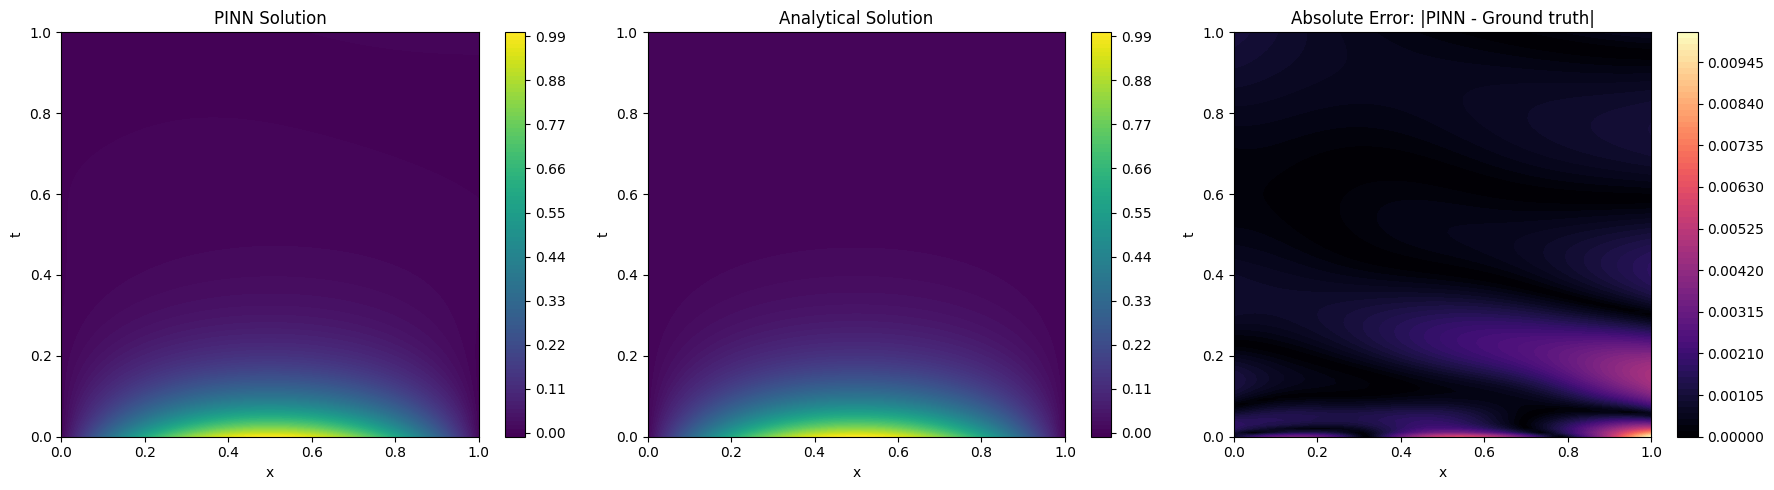


 The mean absolute error (MAE) is  0.0007664366


In [ ]:
torch.manual_seed(314)

model = NeuralNet().to(device)
train_2(model)

plot(model)

As a result of this change, the MAE has been divided by 2.

## 4- Hybrid modelling

**Hybrid modelling.** Here, we assume not to know the boundary conditions entirely. Instead, we have at hand $n$ i.i.d. observations $(T_1, X_1, Y_1)$, $\dots$, $(T_n, X_n, Y_n)$ such that

* $(T, X$) follows the uniform distribution on $[0,1]^2$
* $Y = f^\star(T, X)+\epsilon$,  
* and $f^\star$ is a solution to the heat equation $$\partial_1 f = \partial^2_{2,2} f.$$

In the next example, the unknown function $f^\star$ is once again
$$f^\star(t,x) = \exp(-\pi^2t)\sin(\pi x)$$
and $\epsilon$ is a gaussian noise $N(0,1)$.

**Question 13.** Which empirical loss corresponds to this problem?

**Answer.**
<details>
  <summary>  (Click to show)</summary>
$$L(\theta) = \frac{1}{n}\sum_{i=1}^{n}(f_\theta(T_i, X_i)-Y_i))^2 + \frac{\lambda_c}{n_c}\sum_{k=1}^{n_c}(\partial_t f_\theta(T^{(c)}_k, X^{(c)}_k)-\partial^2_{x,x} f_\theta(T^{(c)}_k, X^{(c)}_k))^2,$$
where the points $T^{(c)}_k$ and $X^{(c)}_k$ are independent and sampled along the uniform distribution on $[0,1]$. $\lambda_n \geq 0$ is an hyperparameter weighting the importance of the PDE penalty.
</details>

**Question 14.** Implement a function to generate the training data using the functions *rand*, *randn*, *zeros*, *ones*, *linspace* and *sin* of the *torch* library. As usual with neural networks, all tensors must be of shape $(*, 1)$.

In [ ]:
# Training data
def generate_training_data_2(N_f=10**4, N_data=10**2, sigma=0.1):
    # Collocation points (interior)
    t_f = torch.rand(N_f, 1, device=device)
    x_f = torch.rand(N_f, 1, device=device)

    # Data points
    t = torch.rand(N_data,1, device=device)
    x = torch.rand(N_data,1, device=device)
    y = np.exp(-torch.pi**2 * t) * np.sin(torch.pi * x)+sigma*torch.randn(N_data,1, device=device)

    return t_f, x_f, t, x, y


**Question 15.** To assess the impact of using the physical a priori on the learning performance, implement two algorithms: one which uses the physical penalty (i.e., $\lambda_n > 0$) and one which does not (i.e., $\lambda_n = 0$).

In [ ]:
def train_without_PDE(model, epochs=5000, lr=1e-3):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    t_f, x_f, t, x, y = generate_training_data_2()

    for epoch in range(epochs):

        optimizer.zero_grad()

        # Data loss
        u_pred = model(t, x)
        loss_data = torch.mean((u_pred - y)**2)

        loss =  loss_data
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4e}")

    print("Training complete.")


def train_hybrid(model, epochs=5000, lr=1e-3):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    t_f, x_f, t, x, y = generate_training_data_2()

    for epoch in range(epochs):

        optimizer.zero_grad()

        # PDE residual loss
        f = pde_residual(model, t_f, x_f)
        loss_f = torch.mean(f**2)

        # Data loss
        u_pred = model(t, x)
        loss_data = torch.mean((u_pred - y)**2)

        loss = loss_f + loss_data
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4e}")

    print("Training complete.")

**Question 16.** Compare their performance.

We first train a neural network without the PDE information.

<ipython-input-124-93e5be92c437>:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = np.exp(-np.pi**2 * t) * np.sin(np.pi * x)+sigma*torch.randn(N_data,1, device=device)


Epoch 0, Loss: 1.7804e-01
Epoch 500, Loss: 2.2260e-02
Epoch 1000, Loss: 2.1730e-02
Epoch 1500, Loss: 1.7201e-02
Epoch 2000, Loss: 1.1279e-02
Epoch 2500, Loss: 9.3938e-03
Epoch 3000, Loss: 8.5419e-03
Epoch 3500, Loss: 7.6890e-03
Epoch 4000, Loss: 7.5403e-03
Epoch 4500, Loss: 7.4792e-03
Training complete.


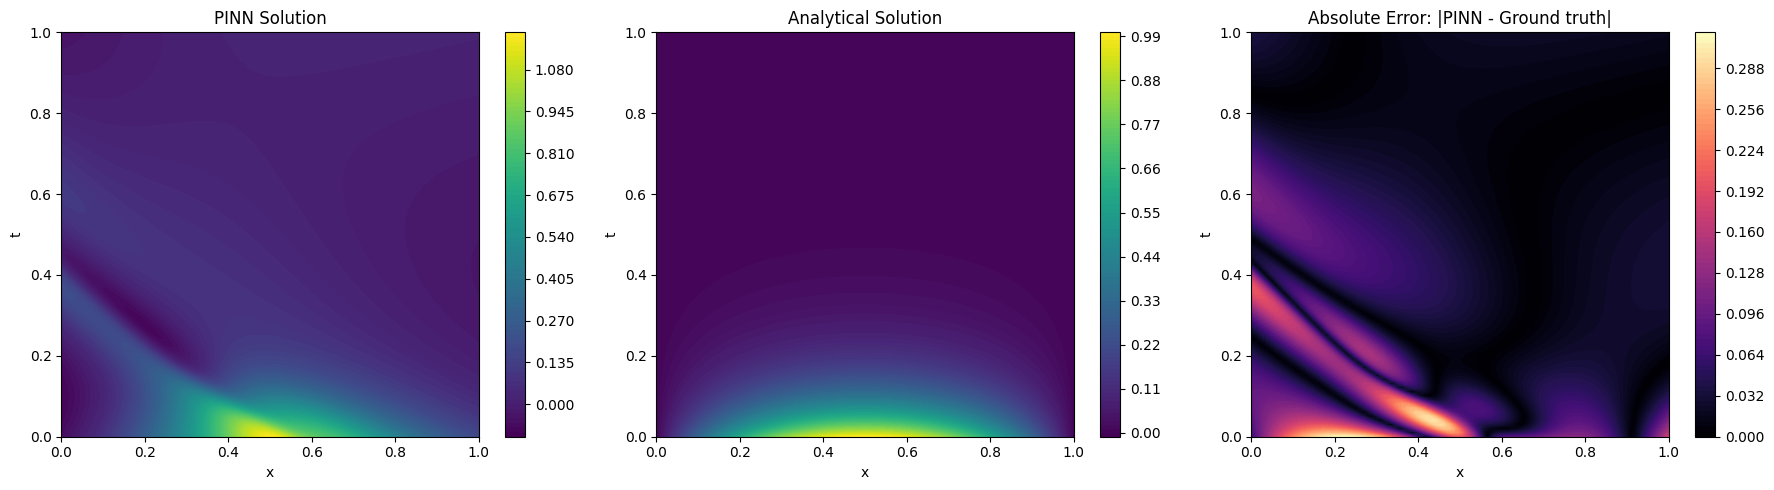


 The mean absolute error (MAE) is  0.036606073


In [ ]:
torch.manual_seed(314)

model = NeuralNet().to(device)
train_without_PDE(model)

plot(model)

Then, we compare it with a PINNs using the PDE.

<ipython-input-124-93e5be92c437>:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = np.exp(-np.pi**2 * t) * np.sin(np.pi * x)+sigma*torch.randn(N_data,1, device=device)


Epoch 0, Loss: 1.7807e-01
Epoch 500, Loss: 2.6398e-02
Epoch 1000, Loss: 2.1265e-02
Epoch 1500, Loss: 2.0099e-02
Epoch 2000, Loss: 1.7503e-02
Epoch 2500, Loss: 1.3918e-02
Epoch 3000, Loss: 1.2367e-02
Epoch 3500, Loss: 1.1554e-02
Epoch 4000, Loss: 1.0958e-02
Epoch 4500, Loss: 1.0503e-02
Training complete.


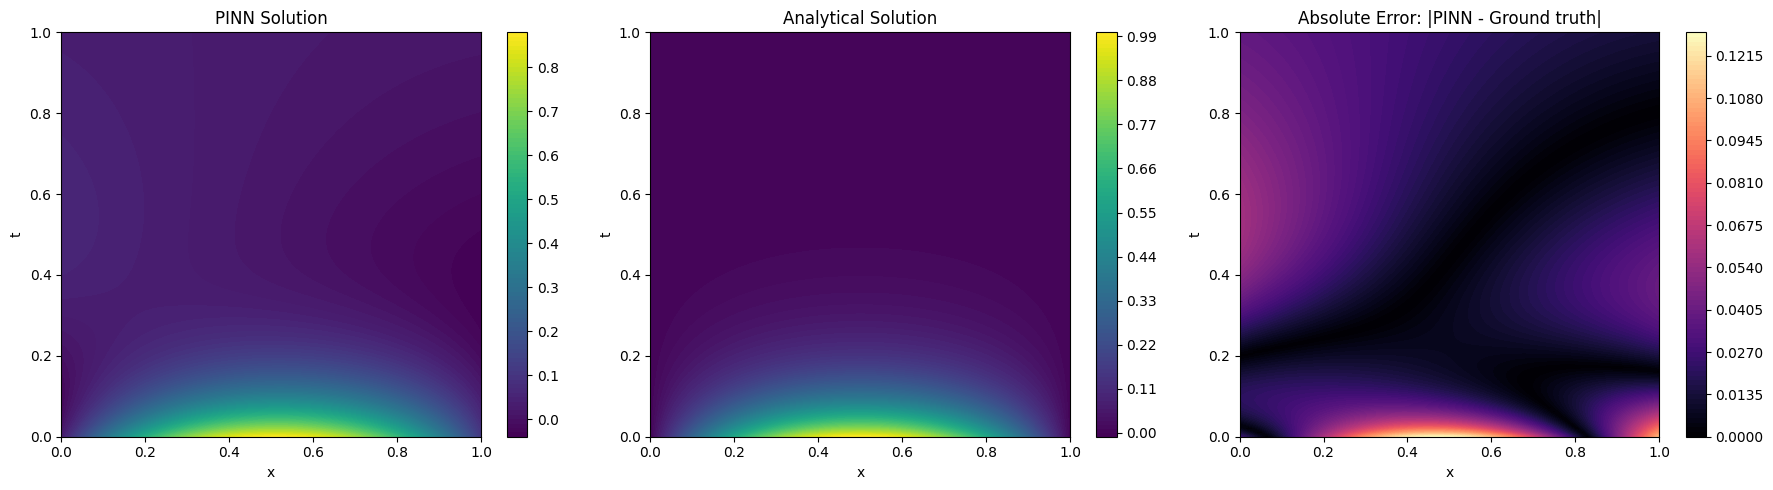


 The mean absolute error (MAE) is  0.021615306


In [ ]:
torch.manual_seed(314)

model = NeuralNet().to(device)
train_hybrid(model)

plot(model)

The MAE has been roughly divided by 2 when using the information from the PDE.

# 5- PINNs overfitting

The following code is an implementation of the ridge / Sobolev penalized PINN.

In [ ]:
def sobolev_loss(model, t, x):
    t.requires_grad_(True)
    x.requires_grad_(True)
    u = model(t, x)

    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), retain_graph=True, create_graph=True)[0]
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), retain_graph=True, create_graph=True)[0]
    u_tx =torch.autograd.grad(u_t, x, grad_outputs=torch.ones_like(u),  create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_tt = torch.autograd.grad(u_t, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]

    return torch.mean(u**2+u_t**2 + u_x**2+ u_xx**2+ u_tx**2+u_tt**2)

In [ ]:
class NeuralNet2(nn.Module):

# This new object will come with two functions "__init__" and "forward".
# "__init__" is useful to give an initial value to the variable "NeuralNet".

    def __init__(self):
        super(NeuralNet2, self).__init__()

        # Here, we define the structure of the neural network.
        self.net = nn.Sequential(
            nn.Linear(2, 30),
            nn.Tanh(),
            nn.Linear(30, 30),
            nn.Tanh(),
            nn.Linear(30, 1)
        )

    def forward(self, t, x):
        input = torch.cat([t, x], dim=1)
        return self.net(input)


def train_hybrid_2(model, epochs=5*10**3+1, lr=1e-3, weight_decay=0, lambda_s=0):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    t_f, x_f, t, x, y = generate_training_data_2(N_f=10**3, N_data=10**1)

    # Evaluate on a grid
    t_vals = torch.linspace(0, 1, 100)
    x_vals = torch.linspace(0, 1, 100)
    T, X = torch.meshgrid(t_vals, x_vals, indexing='ij')
    t_flat = T.reshape(-1, 1).to(device)
    x_flat = X.reshape(-1, 1).to(device)

    #Lists of errors
    training_error = []
    validation_error = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # PDE residual loss
        f = pde_residual(model, t_f, x_f)
        loss_f = torch.mean(f**2)

        # Data loss
        u_pred = model(t, x)
        loss_data = torch.mean((u_pred - y)**2)

        # Sobolev loss
        loss_sobolev = sobolev_loss(model, t_f, x_f)

        loss = loss_f + loss_data + lambda_s*loss_sobolev
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4e}")
            print(f"Epoch {epoch}, Loss data: {loss_data.item():.4e}")



            # PINN prediction
            model.eval()
            with torch.no_grad():
                u_pred = model(t_flat, x_flat)

            # Analytical solution
            u_true = torch.exp(-np.pi**2 * t_flat) * np.sin(np.pi * x_flat)

            # Difference
            err = torch.mean(torch.square(u_pred - u_true))
            print(f"Epoch {epoch}, Validation MSE: {err.item():.4e}")

            training_error.append(loss_data.item())
            validation_error.append(err.item())

    print("Training complete.")
    return training_error, validation_error

In [ ]:
training_wd, validation_wd =[],[]
training, validation =[],[]

for i in range(5):
  torch.manual_seed(i)
  print("With weight decay ", i+1)
  model = NeuralNet2().to(device)
  training_error_wd, validation_error_wd = train_hybrid_2(model, weight_decay=10**-3, lambda_s=5*10**-2)
  training_wd.append(training_error_wd)
  validation_wd.append(validation_error_wd)

  torch.manual_seed(i)
  print("Without wd ", i+1)
  model_2 = NeuralNet2().to(device)

  training_error, validation_error = train_hybrid_2(model_2)
  training.append(training_error)
  validation.append(validation_error)



With weight decay  1
Epoch 0, Loss: 5.7626e-02
Epoch 0, Loss data: 2.9067e-02
Epoch 0, Validation MSE: 4.0346e-02


<ipython-input-12-93e5be92c437>:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = np.exp(-np.pi**2 * t) * np.sin(np.pi * x)+sigma*torch.randn(N_data,1, device=device)
<ipython-input-101-69a5afa3355b>:83: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  u_true = torch.exp(-np.pi**2 * t_flat) * np.sin(np.pi * x_flat)


Epoch 500, Loss: 1.0933e-02
Epoch 500, Loss data: 1.0856e-02
Epoch 500, Validation MSE: 2.6357e-02
Epoch 1000, Loss: 1.0940e-02
Epoch 1000, Loss data: 1.0875e-02
Epoch 1000, Validation MSE: 2.6513e-02
Epoch 1500, Loss: 1.0950e-02
Epoch 1500, Loss data: 1.0896e-02
Epoch 1500, Validation MSE: 2.6607e-02
Epoch 2000, Loss: 1.0961e-02
Epoch 2000, Loss data: 1.0920e-02
Epoch 2000, Validation MSE: 2.6642e-02
Epoch 2500, Loss: 1.0969e-02
Epoch 2500, Loss data: 1.0936e-02
Epoch 2500, Validation MSE: 2.6648e-02
Epoch 3000, Loss: 1.0974e-02
Epoch 3000, Loss data: 1.0944e-02
Epoch 3000, Validation MSE: 2.6648e-02
Epoch 3500, Loss: 1.0978e-02
Epoch 3500, Loss data: 1.0951e-02
Epoch 3500, Validation MSE: 2.6646e-02
Epoch 4000, Loss: 1.0981e-02
Epoch 4000, Loss data: 1.0956e-02
Epoch 4000, Validation MSE: 2.6644e-02
Epoch 4500, Loss: 1.0983e-02
Epoch 4500, Loss data: 1.0959e-02
Epoch 4500, Validation MSE: 2.6643e-02
Epoch 5000, Loss: 1.0984e-02
Epoch 5000, Loss data: 1.0961e-02
Epoch 5000, Validation

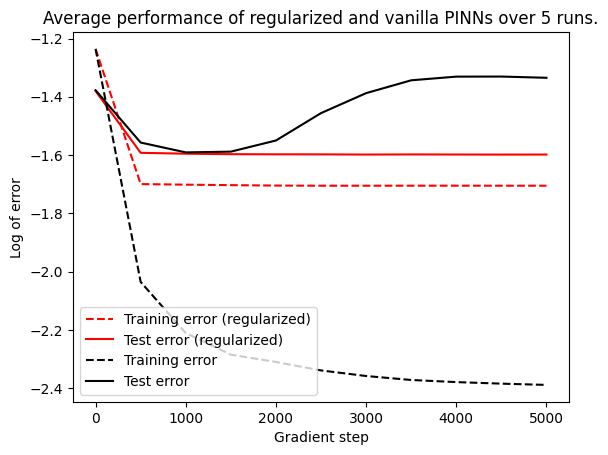

In [ ]:
def log_10(err):
  return np.log10(np.mean(np.array(err), axis=0))

x_lab = [500*i for i in range(11)]

plt.plot(x_lab, log_10(training_wd), c='red', linestyle="--", label="Training error (regularized)")
plt.plot(x_lab, log_10(validation_wd), c='red', label="Test error (regularized)")
plt.plot(x_lab, log_10(training),  c="black", linestyle="--", label="Training error ")
plt.plot(x_lab, log_10(validation),  c='black', label="Test error")
plt.xlabel("Gradient step")
plt.ylabel("Log of error")
plt.title("Average performance of regularized and vanilla PINNs over 5 runs.")
plt.legend()
plt.show()

**Question 17.** Using the theoretical properties developped in the lectures,  explain the results.

**Answer.**
<details>
  <summary>  (Click to show)</summary>

This graph plots the training and validation errors of regularized and unregularized PINNs over 5 runs. Both PINNs are fully connected $\tanh$ neural networks with 2 layers of $30$ neurons each. They are trained with $n=10$ data points and $n_r = 10^3$ collocation points. Regularized PINNs have a weight decay (equivalent to Ridge penalty) of $10^{-3}$ and a Sobolev regularization hyperparameter $\lambda_s = 0.05$.

Contrary to the setting of the Bernoulli paper, we do not have access to a minimizing sequence of the empirical risk, but to a sequence generated by gradient descent. Moreover, the Bernoulli paper focused on the overfitting of the physics theoretical risk
$$ R_n(f) = n^{-1}\sum_{j=1}^n (f(X_i)-Y_i)^2 + \int_\Omega D(f,x)^2dx,$$
whereas here we only focus on the data-fidelity theoretical risk $$R(f) = \mathbb E((f(X)-f^\star(X))^2).$$ In particular, if $f$ overfits, then $R_n(f) \to \infty$, but  $R(f)$ does not necessarily diverge.

(i) However, we clearly see that unregularized PINNs overfit. Indeed, while their empirical error decreases with the number of epochs, their theoretical error increases. Therefore, this generalizes the results of the Bernoulli paper to sequences generated by gradient descent.

(ii) Though theoretically, adding the Ridge and Sobolev penalty implies that the regularized PINN does not overfit, the gradient descent might still not find a global minimum of the regularized theoretical risk. Thus, the regularized PINNs may underfit.

(iii) Despite all of this, the regularized PINN outperforms the unregularized PINN.
</details>

# 6- Going Further

PINNs are interesting because they adapt seamlessly to many contexts in PDE solving and hybrid modelling without  increasing the complexity of the algorithm.


**Question 18: Nonlinear PDEs** Nonlinear PDEs are notoriously difficult to solve. However, implementing PINNs to solve nonlinear PDEs is straightforward.  Implement a PINN to solve the Burgers equation $$\partial_1 f + f \partial_2 f = 0$$ on the square $[0,1]$ with initial conditions $f(0,x) = 1+x$ and boundary conditions $$f(t,0) = \frac{1}{1+t}.$$ Compare it with the values of the unique solution $f(t,x) = \frac{1+x}{1+t}$.
(Hint: You only need to change the function *pde_residual* and to get rid of the boundary and initial conditions).

**Question 19: General geometries.** Solving PDEs on complex geometries often results in complicated meshes when using classical techniques However, PINNs can be easily implemented to solve PDEs on general geometries. Implement a PINN to solve the Laplace equation $$\partial^2_{1,1} f + \partial^2_{2,2} f + \partial^3_{3,3} f = 6$$ on the ball $\{(x_1, x_2, x_3)\in \mathbb R^3, \; x_1^2 + x_2^2+x_3^3 \leq 1\}$ with boundary conditions
* $f(x_1,x_2,x_3) = x_1^2+x_2^2+x_3^2$ if $x_1^2+x_2^2+x_3^2 = 1$.

Compare these values with those of the solution $f(x_1,x_2, x_3) = x_1^2+x_2^2+x_3^2$.